https://github.com/mamintoosi/FS-in-Bio-Graphs

In [10]:
import os, time
# from time import gmtime, strftime
if hasattr(time, 'tzset'):
    os.environ['TZ'] = 'Asia/Tehran'
    time.tzset()
print(time.strftime('%X'))


10:47:03


In [11]:
# Install required packages.

In [12]:
# !git clone https://github.com/mamintoosi/FS-in-Bio-Graphs.git

In [13]:
# %cd FS-in-Bio-Graphs/

Common Plants


AttributeError: 'VennDiagram' object has no attribute 'clf'

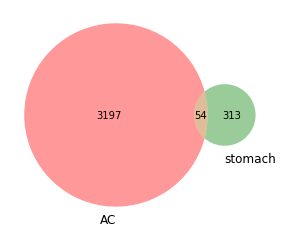

In [35]:
%run src/main_stats.py --dataset_name stomach

[autoreload of bio_graph_utils failed: Traceback (most recent call last):
  File "/home/mahmood/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/mahmood/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/mahmood/anaconda3/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/mahmood/anaconda3/lib/python3.7/importlib/__init__.py", line 168, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module 'bio_graph_utils'
]
[autoreload of bio_graph_utils failed: Traceback (most recent call last):
  File "/home/mahmood/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/mahmood/anaconda

Min Number of Metabolites in each Plant:  1
Max Number of Metabolites in each Plant:  244
Avg Number of Metabolites in each Plant:  8
Min Number of Plants having each Metabolite:  1
Max Number of Plants having each Metabolite:  14
Avg Number of Plants having each Metabolite:  2
Min Number of Metabolites in each Plant:  1
Max Number of Metabolites in each Plant:  33
Avg Number of Metabolites in each Plant:  2
Min Number of Plants having each Metabolite:  1
Max Number of Plants having each Metabolite:  241
Avg Number of Plants having each Metabolite:  33


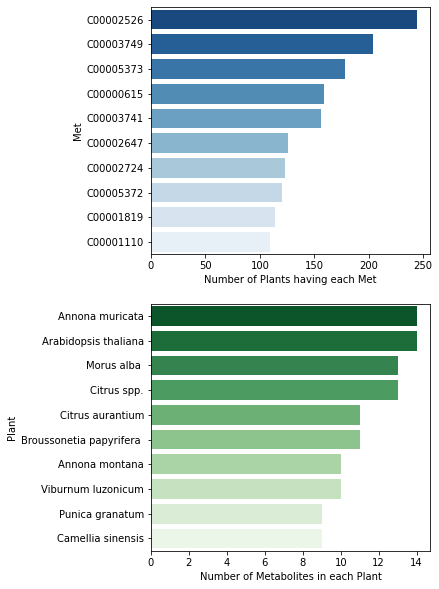

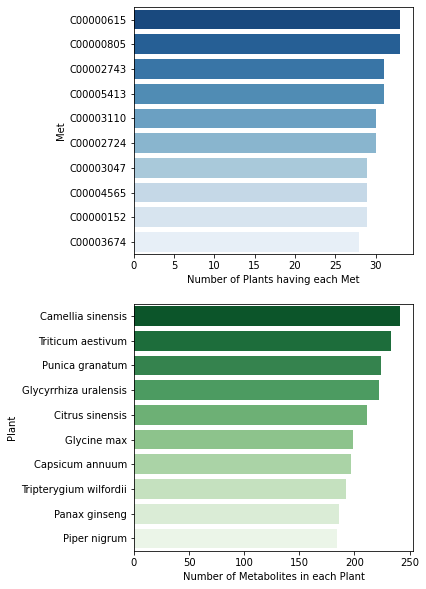

In [27]:
# wdf['Met'].value_counts().max()
# ax = sns.countplot(data = wdf, x='Met', order=wdf['Met'].value_counts('Met').iloc[:10].index, palette=['#99FF44'])
# ax.tick_params(axis='x', rotation=90)
# ax.set(xlabel='10 Most frequent Metabolites')
# ax.set(ylabel='Number of Plants having each Met')
# sns.color_palette("flare", as_cmap=True)
#  palette="Set3"
# plt.setp(g.get_xticklabels(), rotation=90)
# ,color="salmon"
%reload_ext autoreload
%autoreload 2
 
from src.bio_graph_utils import df_bar_plot
# df_bar_plot(wdf, 'results/AC_bar_charts.png')
# df_bar_plot(true_df, 'results/stomach_bar_charts.png')
df_bar_plot(true_df, 'results/breast_bar_charts.png')

In [26]:
round(1.650004)

2

In [16]:
print(len(wdf))
print(len(wdf['Met'].unique()))
print(len(wdf['Plant'].unique()))

5392
667
3251


Table info:  (5392, 2)
Number of unique nodes (Plants) in main file:  3251


Number of intersection Meabolites: 324


TypeError: 'AxesSubplot' object is not subscriptable

CPU times: user 8min 16s, sys: 2.88 s, total: 8min 19s
Wall time: 8min 17s


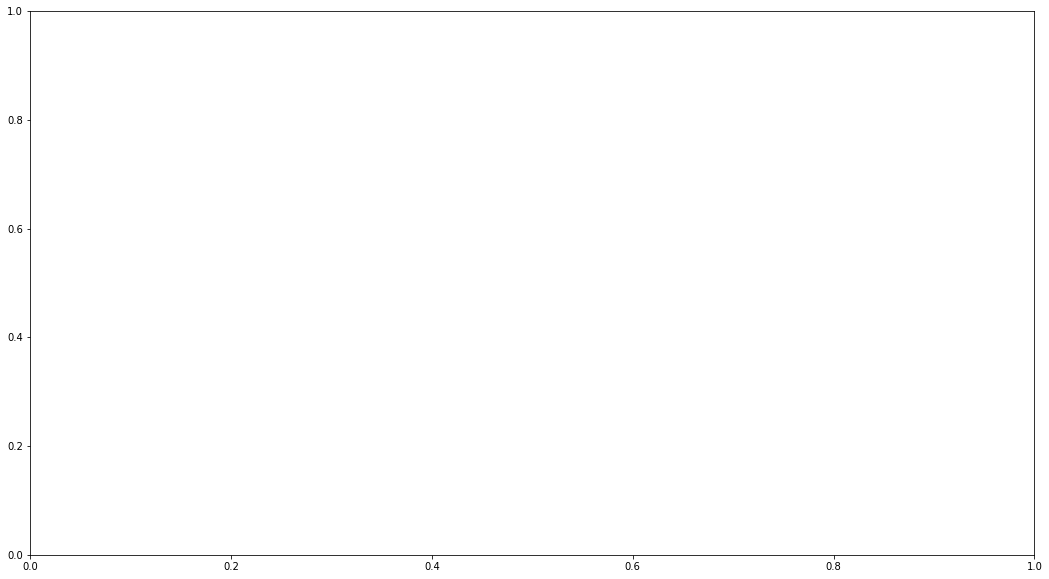

In [1]:
%%time
%run src/main_features.py --dataset_name breast

Table info:  (5392, 2)
Number of unique nodes (Plants) in main file:  3251


Abelmoschus manihot     381
Abies alba               50
Abies amabilis          335
Abies lasiocarpa         43
Abrus precatorius       125
                       ... 
Zinnia elegans          177
Ziziphora hispanica      41
Ziziphus cambodiana     155
Ziziphus jujuba         470
Zollernia paraensis      45
Name: degree, Length: 3050, dtype: int64


CPU times: user 6min 43s, sys: 554 ms, total: 6min 44s
Wall time: 6min 43s


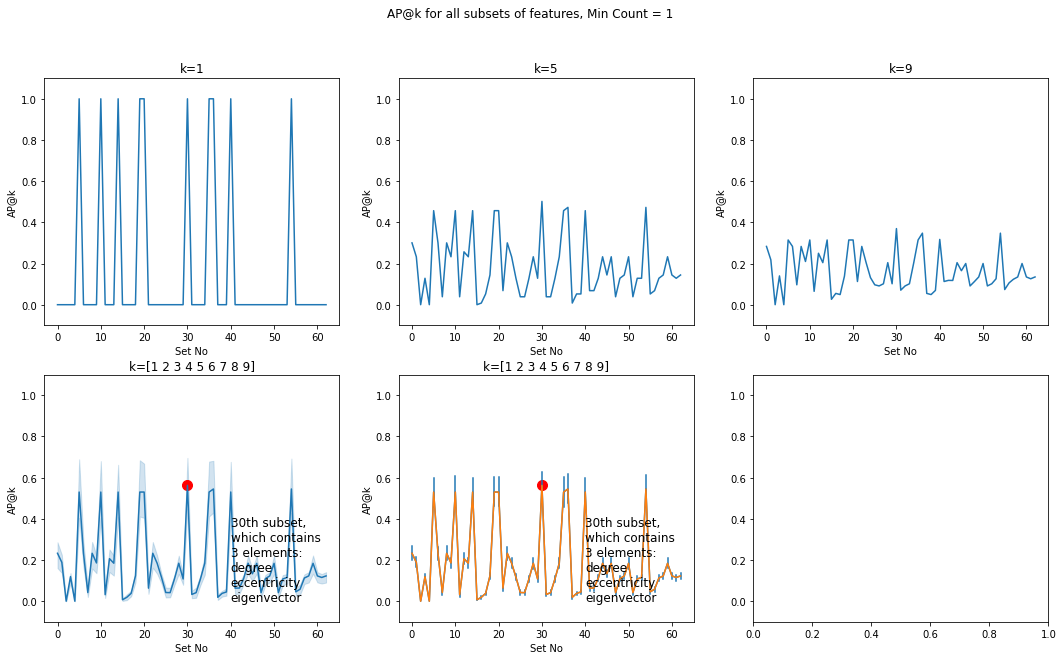

In [6]:
%%time
%run src/main_features.py --dataset_name stomach

In [3]:
wdf

,Met,Plant
0,C00000113,Arabidopsis thaliana
1,C00000152,Arabidopsis thaliana
2,C00000615,Arabidopsis thaliana
3,C00000911,Arabidopsis thaliana
4,C00000982,Arabidopsis thaliana
...,...,...
5387,C00051087,Citrus tachibana
5388,C00051138,Citrus tachibana
5389,C00051211,Vernonia lasiopus
5390,C00051328,Citrus paradisi x


Table info:  (5392, 2)
Number of unique nodes (Plants) in main file:  3251


Abelmoschus manihot     381
Abies alba               50
Abies amabilis          335
Abies lasiocarpa         43
Abrus precatorius       125
                       ... 
Zinnia elegans          177
Ziziphora hispanica      41
Ziziphus cambodiana     155
Ziziphus jujuba         470
Zollernia paraensis      45
Name: degree, Length: 3050, dtype: int64


CPU times: user 5min 57s, sys: 691 ms, total: 5min 58s
Wall time: 5min 57s


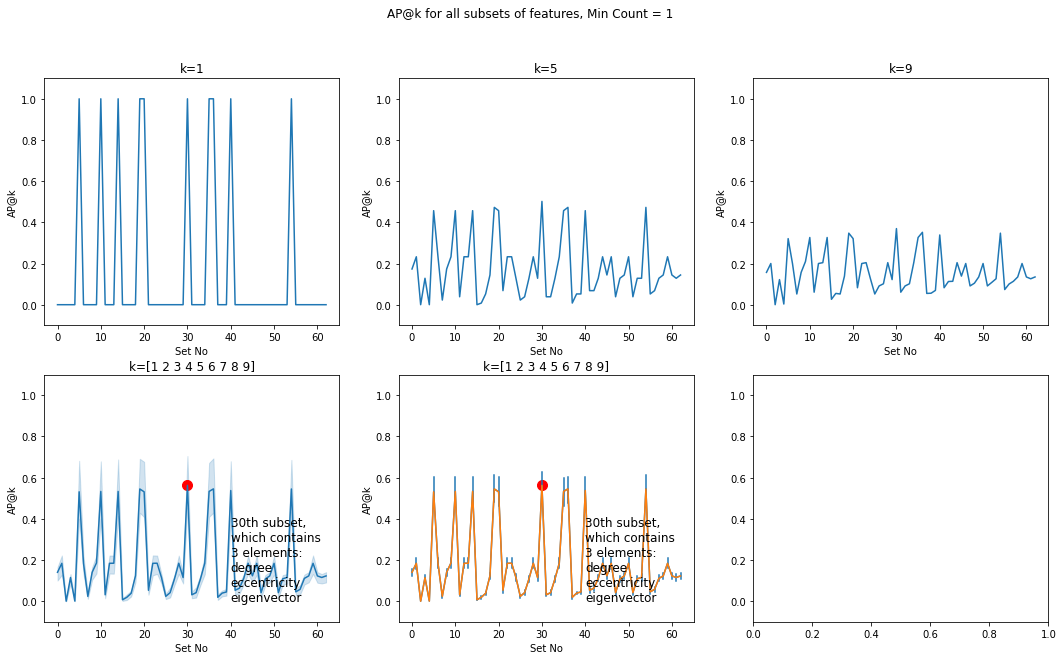

In [2]:
%%time
%run src/main_features.py --dataset_name Wound_healing

In [5]:
f = [f_names[i] for i in indices[-1]]
f, best_idx

(['degree',
  'degree_cent',
  'betweenness',
  'closeness',
  'eccentricity',
  'eigenvector'],
 30)

In [ ]:
# from google.colab import files
# files.download(score_file_name) 
# files.download(score_png_file_name) 
# files.download(ON_ong_file_name) 
# files.download(RT_ong_file_name) 

In [6]:
gf_df.iloc[0,0]

0.513888888888889

In [9]:
d = subG.degree()
print(d)
d = subG.degree(weight='weight')
print(d)

[('Angelica furcijuga', 24), ('Annona muricata', 8), ('Arabidopsis thaliana', 32), ('Ardisia colorata', 24), ('Broussonetia papyrifera ', 13), ('Camellia sinensis', 25), ('Citrus aurantium', 14), ('Citrus limon ', 22), ('Citrus reticulata', 6), ('Citrus spp.', 18), ('Diospyros kaki', 22), ('Garcinia mangostana', 1), ('Glehnia littoralis ', 26), ('Glycine max ', 21), ('Glycyrrhiza glabra', 21), ('Glycyrrhiza uralensis ', 21), ('Hibiscus taiwanensis', 15), ('Hippophae rhamnoides ', 22), ('Hypericum perforatum', 25), ('Juniperus phoenicea', 1), ('Medicago sativa ', 21), ('Melilotus messanensis', 17), ('Morus alba ', 22), ('Peltophorum africanum ', 25), ('Phellodendron amurense', 27), ('Phyllanthus emblica ', 26), ('Plantago major', 21), ('Poncirus trifoliata', 8), ('Psidium guajava ', 22), ('Punica granatum', 31), ('Salvia officinalis', 22), ('Sedum takesimense', 24), ('Syzygium cumini ', 17), ('Taxus baccata ', 24), ('Theobroma cacao', 25), ('Thuja orientalis ', 17), ('Trifolium pratense

In [20]:
dfct_subG.head()

Met,C00000113,C00000152,C00000297,C00000584,C00000591,C00000610,C00000615,C00000619,C00000871,C00000911,...,C00045353,C00045354,C00046173,C00046174,C00046175,C00046176,C00046178,C00050430,C00050503,C00051667
Plant,,,,,,,,,,,,,,,,,,,,,
Angelica furcijuga,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Annona muricata,0,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,0,1
Arabidopsis thaliana,1,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Ardisia colorata,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Broussonetia papyrifera,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
print('Number of Metabolites in connected subG of AC: ', len(dfct_subG.columns))
second_graph_edges = list(true_df[edge_objects].unique())
print('Number of Metabolites in Wound healing: ',len(second_graph_edges))
intersected_edges = set(dfct_subG.columns).intersection(set(second_graph_edges))
print('Number of intersection Meabolites:', len(intersected_edges))

Number of Metabolites in connected subG of AC:  140
Number of Metabolites in Wound healing:  2944
Number of intersection Meabolites: 90


In [38]:
dfct_subG_cp = dfct_subG.copy()
# dfct_subG_cp.head()


In [39]:
print(dfct_subG_cp.loc['Angelica furcijuga'].sum())
for row in range(dfct_subG_cp.shape[0]):
    for e in intersected_edges:
        if dfct_subG_cp.iloc[row][e] != 0:
            dfct_subG_cp.iloc[row][e] += 1
# dfct_subG_cp.loc['Angelica furcijuga','C00000113']
print(dfct_subG_cp.loc['Angelica furcijuga'].sum())

7
14


فقط ده گیاه مشترک در دو فایل داریم و نود متابولیت مشترک.
الان از متابولیت‌های فایل دوم هیچ استفاده‌ای نداریم. 

In [39]:
print('Number of Plants in connected subG of AC: ',len(dfct_subG.index.values)) 
second_graph_nodes = list(true_df[node_objects].unique())
print('Number of Plants in Wound healing: ',len(second_graph_nodes))
print('Number of intersection Plants:',len(set(dfct_subG.index.values).intersection(set(second_graph_nodes))))
# len(dfct.index.values)

Number of Plants in connected subG of AC:  38
Number of Plants in Wound healing:  253
Number of intersection Plants: 10


In [45]:
edges,weights = zip(*nx.get_edge_attributes(subG,'weight').items())
print(edges[:4])
print(weights[:4])

(('Angelica furcijuga', 'Arabidopsis thaliana'), ('Angelica furcijuga', 'Ardisia colorata'), ('Angelica furcijuga', 'Camellia sinensis'), ('Angelica furcijuga', 'Citrus limon '))
(1, 1, 2, 1)


In [76]:
# subG['Angelica furcijuga']
list1 = list(dfct_subG.loc['Angelica furcijuga'])
list2 = list(dfct_subG.loc['Camellia sinensis'])
list3 = [sum(x) for x in zip(list1, list2)]
indices = [i for i, x in enumerate(list3) if x == 2]
len(indices)
# دو یعنی در دو متابولیت مشترک بوده‌اند

2

In [4]:
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
print(edges[:4])
print(weights[:4])

(('Angelica furcijuga', 'Arabidopsis thaliana'), ('Angelica furcijuga', 'Ardisia colorata'), ('Angelica furcijuga', 'Camellia sinensis'), ('Angelica furcijuga', 'Citrus limon '))
(1, 1, 2, 1)


In [8]:
wdf[node_objects].value_counts()

Annona muricata             14
Arabidopsis thaliana        14
Citrus spp.                 13
Morus alba                  13
Broussonetia papyrifera     11
                            ..
Annona dioica                1
Acacia pycnantha             1
Euchresta horsfeldii         1
Isatis indigotica            1
Coronilla scorpioides        1
Name: Plant, Length: 3251, dtype: int64

In [12]:
# df.head()
wdf[node_objects]

0          Arabidopsis thaliana
1          Arabidopsis thaliana
2          Arabidopsis thaliana
3          Arabidopsis thaliana
4          Arabidopsis thaliana
                 ...           
5387          Citrus tachibana 
5388          Citrus tachibana 
5389         Vernonia lasiopus 
5390          Citrus paradisi x
5391    Chrysosplenium grayanum
Name: Plant, Length: 5392, dtype: object

In [ ]:
import os, time
# from time import gmtime, strftime
if hasattr(time, 'tzset'):
    os.environ['TZ'] = 'Asia/Tehran'
    time.tzset()
print(time.strftime('%X'))